**Data Manipulation**

In [3]:
import pandas as pd
import numpy as np

load data

In [4]:
from  google.colab import files
uploaded = files.upload()
#if u prefer url, uncomment following lines
#url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
#df = pd.read_csv(url)

Saving titanic.csv to titanic (1).csv


In [5]:
df = pd.read_csv('/content/titanic.csv')

In [6]:
df.shape

(887, 8)

In [7]:
df.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [8]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
Siblings/Spouses Aboard,0
Parents/Children Aboard,0
Fare,0


Clean data

In [9]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df.drop(columns=['Name'], inplace=True)

<ipython-input-9-aa7081918d43>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


**Confirm no missing values**

In [10]:
assert df['Age'].isnull().sum() == 0
print("\nData cleaned successfully!")


Data cleaned successfully!


**Visualization with Matplotlib/Seaborn**

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

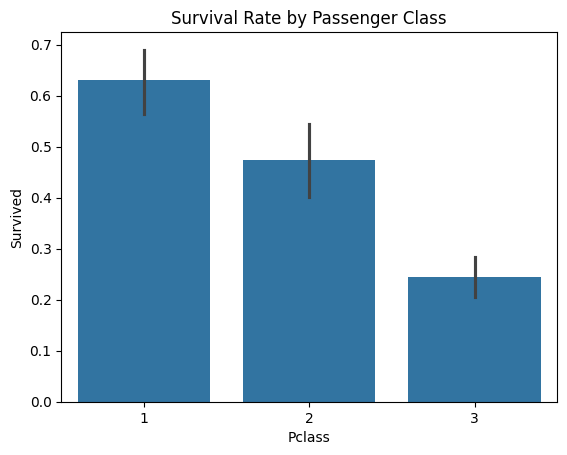

In [12]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

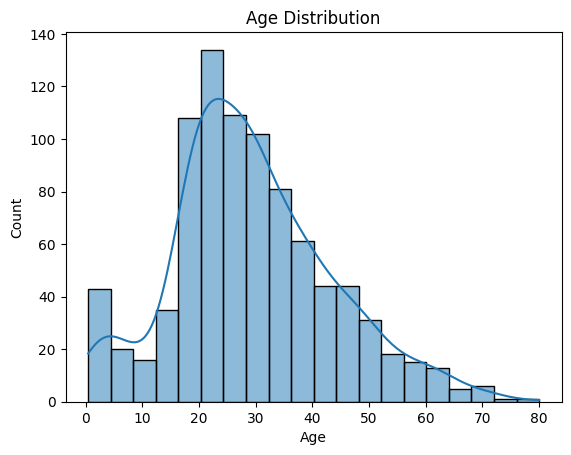

In [13]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show

**Predictive Model (Regression)**

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [15]:
# prepare data
X = df[['Pclass', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']]
y = df['Age']

In [16]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train.shape

(709, 4)

In [18]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# predict & evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.2f}")

MSE: 154.26


**Classification Model (Logistic Regression)**

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [21]:
#prepare data
X = df[['Pclass', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']]
y = df['Survived']

In [22]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
#Train model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [24]:
#predict & evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:{accuracy:.2f}")

assert accuracy > 0.65, "Model underperforms!"
print(confusion_matrix(y_test, y_pred))

Accuracy:0.67
[[90 21]
 [38 29]]


**Classification Model (Decision Tree)**

In [25]:
from sklearn.tree import DecisionTreeClassifier
#train model
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# predict & evaluate
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.67


In [26]:
# check for overfitting (train vs test accuracy)
train_acc = tree.score(X_train, y_train)
test_acc = tree.score(X_test, y_test)
assert abs(train_acc - test_acc) < 0.2, "Overfitting detected!"

**Model Interpretability**

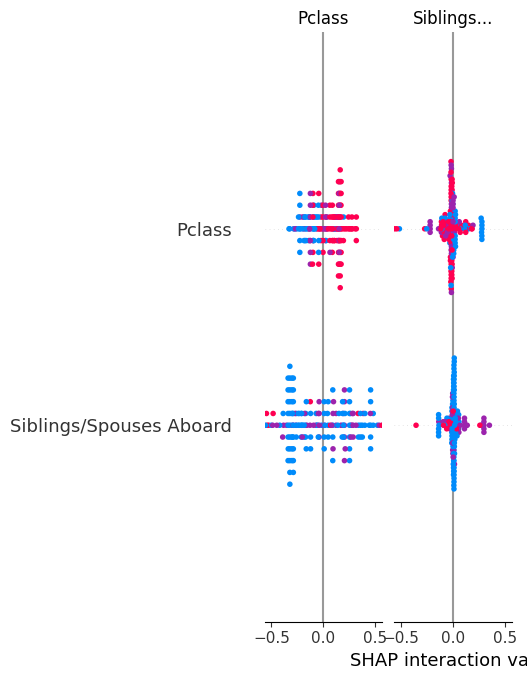

In [27]:
import shap

#Explain a Decision Tree model
explainer = shap.TreeExplainer(tree)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

**Extra to learn**

Creating new features

In [29]:
# Creating new features for the Titanic dataset
df['FamilySize'] = df['Siblings/Spouses Aboard'] + df['Parents/Children Aboard']
df['IsAlone'] = (df['FamilySize'] == 0).astype(int)

Hyperparameter tuning

In [33]:
from sklearn.model_selection import GridSearchCV
# Tune Decision Tree for classification
params = {'max_depth': [3, 5, 7], 'min_samples_split': [2, 5]}
grid = GridSearchCV(DecisionTreeClassifier(), params, cv=5)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
assert grid.best_score_ > 0.7, "Tuning did not improve model"


Best params: {'max_depth': 3, 'min_samples_split': 2}


Handling imbalance data

In [38]:
from sklearn.utils import resample

minority = df[df['Survived']== 1]
majority = df[df['Survived']== 0]
minority_unsampled = resample(minority, replace=True, n_samples=len(majority))

df_balanced = pd.concat([minority_unsampled, majority])

#assert df_balanced['Survived'].value_counts().nunique == 2, "Data is not balanced"
